# Excess of loss considerations

We consider a one year time period for which the liability of the insurance company splits into 
$$
S = D + R = \sum_{i = 1}^N U_i = \sum_{i = 1}^N \min(U_i, \gamma) + \sum_{i = 1}^N \max(U_i- \gamma, 0)
$$
where $N$ is Poisson distributed with paramater $\lambda$ hich corresponds to the expected number of claims over the period, $D$ is the loss retained by the insurance company and $R$ amount transfered to the reinsurer. $\gamma$ is the priority of the XOL reinsurance treaty.

We assume that $U\sim\text{composite}(f_1, f_2, \gamma)$

In [1]:
import sys
sys.path.insert(0,'/home/pgoffard/BayesSplicedModels/')
%run ../preamble.py
danish = pd.read_csv("../Data/Danish/danish.csv").x

In [2]:
f1, f2 = bsm.loss_model("Exp", ["λ1"]), bsm.loss_model("Pareto-Tail", ["α2"]) 
f = bsm.spliced_loss_model(f1, f2, "disjoint")
parms_f1, parms_f2, γ, p = np.array([2]), np.array([2]), 1, 0.8
parms = np.append(np.append(parms_f1, parms_f2), [γ, p])
f1.set_pdf(), f2.set_pdf(), f1.set_cdf(), f2.set_cdf(), f.set_pdf(), f.set_cdf()

(None, None, None, None, None, None)

In [26]:
f.pdf(parms, 0.5)
priority, limit = 2, np.inf
π = sc.integrate.quad(lambda x: x*f.pdf(parms, x), 0, np.inf)[0]
π2 = sc.integrate.quad(lambda x: min(x-priority, limit) * f.pdf(parms, x), priority, np.inf)[0]
# π1 = sc.integrate.quad(lambda x: x * f.pdf(parms, x), 0, priority)[0] +\
# priority *(f.cdf(parms, priority + limit) - f.cdf(parms, priority)) +\
# sc.integrate.quad(lambda x: (x-limit) * f.pdf(parms, x), priority + limit , np.inf)[0]
π1,  π - π2

(nan, 0.5747858858002676)

C:\Users\pierr\AppData\Local\Temp/ipykernel_19368/3640427314.py:9: RuntimeWarning: invalid value encountered in multiply
  S, R = np.sum(X), np.sum(X[np.logical_and(X > priority, X-priority < limit)]-priority) + np.sum(np.logical_and(X > priority, X-priority > limit)) * limit


nan

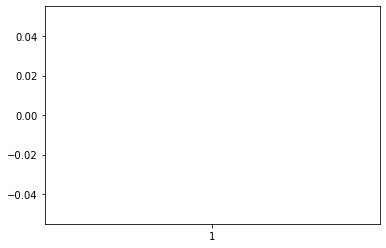

In [28]:
λ = 1000
PnL = []
for k in range(10000):
    N = np.random.poisson(λ, 1)
    X = f.sample(parms, N)
    π = sc.integrate.quad(lambda x: x*f.pdf(parms, x), 0, np.inf)[0]
    π2 = sc.integrate.quad(lambda x: min(x-priority, limit) * f.pdf(parms, x), priority, np.inf)[0]
    π1 = π - π2
    S, R = np.sum(X), np.sum(X[np.logical_and(X > priority, X-priority < limit)]-priority) + np.sum(np.logical_and(X > priority, X-priority > limit)) * limit
    # D = np.sum(X[X < priority]) + np.sum(X > priority)*priority  +np.sum(X[np.logical_and(X > priority, X-priority > limit)]-(priority+limit))
    D = S - R
    PnL.append(π1 * λ - D)

plt.boxplot(PnL)
np.quantile(np.array(PnL), 0.005)

In [7]:
λ*π, np.sum(X)

(674.7858858002675, 694.8913650781129)